In [1]:
# Built-in/Generic Imports
import os
import sys
#

# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import mglearn.plots
#

# Modules
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
#

#Suppress scientific notation
np.set_printoptions(suppress=True)


In [2]:
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  28.11      39.28     188.5     2501.         0.1634     0.3454
    0.4268     0.2012     0.304      0.09744    2.873      4.885
   21.98     542.2        0.03113    0.1354     0.396      0.05279
    0.07895    0.02984   36.04      49.54     251.2     4254.
    0.2226     1.058      1.252      0.291      0.6638     0.2075 ]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [4]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [5]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


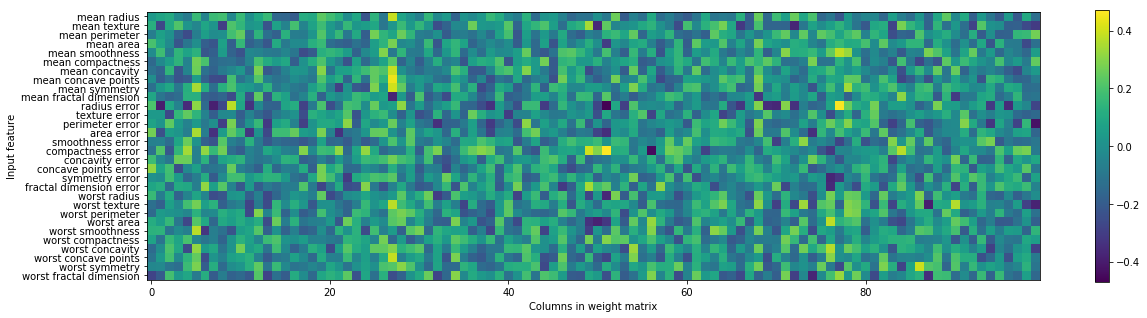

In [6]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()